# Analysis and Prediction of Internet Firewall Data
CS 677 Final Project (Prof. Enxing, Spring 2022)

Group 3 (Max Shroyer)

Yiduo Feng

April 27th 2022
##

## Dataset Details
This data set provide 65533 datas collected from the internet traffic records on a university's firewall.
> **  Description  **: The features includes Source Port,Destination Port, NAT Source Port, NAT Destination Port, Action, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received. Here I will consider “Action” as class. There are 4 classes in total. These are allow, deny, drop and reset-both classes. The data set source address is https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data.


In [1]:
from load_df import *
print_df()

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

      Action    Bytes  Bytes Sent  Bytes Received  

## Objective
In recent years, computers and technology have gradually become the mainstream of society. Information technology pervades almost every industry in the world, including education, medicine and even government. This phenomenon of large-scale use of technology has made network security a topic that people are increasingly paying attention to. Firewall, the most basic computer protection mechanism, has become an indispensable tool for every industry that uses the Internet.Firewalls often decide different actions for different situations and information. These actions include allow, deny, drop, reset-both.
The following analysis and algorithm will give a prediction to check the actions.


## K-Nearest Neighbors Algorithm
The k-nearest neighbor algorithm is a basic classification and regression method, that is, given a training data set, for a new input instance, find the K instances closest to the instance in the training data set, and most of these K instances belong to a certain class, classify the input instance into this class.
Here, I chose seven k values which are 3, 5, 7, 9, 11, 13, 15 to train the 11 features, and print the accuracy below.
According to the list of accuracies and the plot, the best k we choose is 3, and the accuracy is about 99.85%

[0.9984740279558079, 0.9982298724287371, 0.997863639138131, 0.997466886406641, 0.9976194836110602, 0.9974363669657572, 0.9969175364707319]


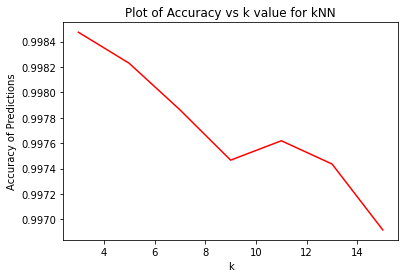

+-------+----+-------+----+--------------------+--------------------+--------------------+
|   TP  | FP |   TN  | FN |      accuracy      |        TPR         |        TNR         |
+-------+----+-------+----+--------------------+--------------------+--------------------+
| 18846 | 12 | 13870 | 38 | 0.9984740279558079 | 0.9979877144672739 | 0.9991355712433367 |
+-------+----+-------+----+--------------------+--------------------+--------------------+
0.9984740279558079
+-------+----+-------+----+--------------------+--------------------+--------------------+
|   TP  | FP |   TN  | FN |      accuracy      |        TPR         |        TNR         |
+-------+----+-------+----+--------------------+--------------------+--------------------+
| 18846 | 12 | 13870 | 38 | 0.9984740279558079 | 0.9979877144672739 | 0.9991355712433367 |
+-------+----+-------+----+--------------------+--------------------+--------------------+


In [2]:
from k_NN import *
get_accuracy_knn()
get_plot_knn()
get_table_knn()

## Logistic Regression
Like many other machine learning algorithms, logistic regression is borrowed from statistics. Logistic regression is the preferred method for binary classification tasks. It outputs a discrete binary result between 0 and 1.
Base on there are four actions in this data set, and Logistic regression only have 2 kind of results, we consider action "Allow" is 0, and others is 1.
> Even if both logistic regression and linear regression have a linear decision boundary, logistic regression gives a discrete result but linear regression gives a continuous result. For the firewall action, it does not belong to a continuous result, so we choose to use logistic regression.

According to the table below, the accuracy of each part in logistic regression is lower than that in k-nn algorithm. Even though Logistic regression is a very efficient algorithm to predict this kind of data set, I think the reason of lower accuracy is that I have to combine the three other cases except "Allow" for returning only 1 and 0 by logistic regression, but the features values of "deny", "drop" and "reset-both" are different.

In [3]:
from logistic_regression import *
get_accuracy_logistic()
get_table_logistic()

0.9396630653726423
+-------+----+-------+------+--------------------+--------------------+--------------------+
|   TP  | FP |   TN  |  FN  |      accuracy      |        TPR         |        TNR         |
+-------+----+-------+------+--------------------+--------------------+--------------------+
| 17005 | 98 | 13784 | 1879 | 0.9396630653726423 | 0.9004977758949375 | 0.9929404984872496 |
+-------+----+-------+------+--------------------+--------------------+--------------------+
0.9396630653726423
+-------+----+-------+------+--------------------+--------------------+--------------------+
|   TP  | FP |   TN  |  FN  |      accuracy      |        TPR         |        TNR         |
+-------+----+-------+------+--------------------+--------------------+--------------------+
| 17005 | 98 | 13784 | 1879 | 0.9396630653726423 | 0.9004977758949375 | 0.9929404984872496 |
+-------+----+-------+------+--------------------+--------------------+--------------------+


## Linear Regression

-----------------allow------------------------
weight =  [-1.15593855e-01  1.05107494e+04]
 
-0.1156 x + 1.051e+04
SSE =  [3.11941661e+12]
rmes =  2.7473090771704532e+16


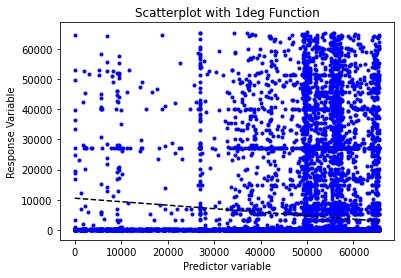

weight =  [-9.28107694e-07 -4.20981428e-02  9.31895428e+03]
            2
-9.281e-07 x - 0.0421 x + 9319
SSE =  [3.1205604e+12]
rmes =  2.7493241543276016e+16


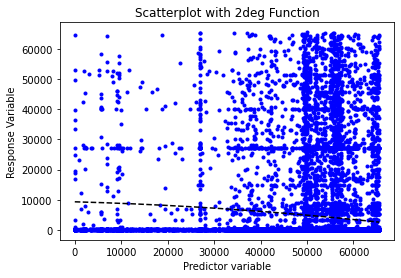

weight =  [ 1.12674556e-10 -1.37680829e-05  3.67562020e-01  6.60423703e+03]
           3             2
1.127e-10 x - 1.377e-05 x + 0.3676 x + 6604
SSE =  [3.123571e+12]
rmes =  2.754631597664417e+16


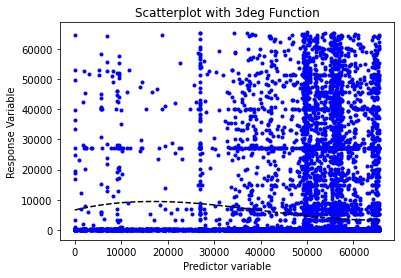

-----------------deny------------------------
weight =  [-4.84605713e-01  4.11341454e+04]
 
-0.4846 x + 4.113e+04
SSE =  [7.73024047e+12]
rmes =  3.0724631721963437e+17


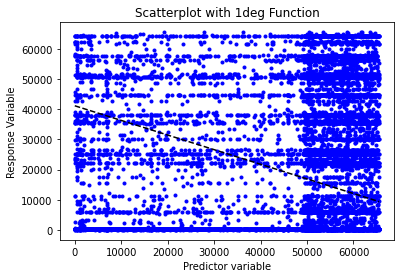

weight =  [-6.72171919e-06 -1.88245195e-02  3.63616442e+04]
            2
-6.722e-06 x - 0.01882 x + 3.636e+04
SSE =  [7.78965535e+12]
rmes =  3.1198747852479085e+17


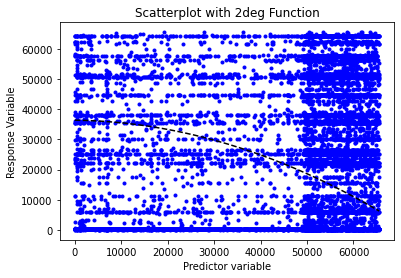

weight =  [ 4.96527951e-10 -5.89160780e-05  1.44767246e+00  2.92989956e+04]
           3             2
4.965e-10 x - 5.892e-05 x + 1.448 x + 2.93e+04
SSE =  [7.90272579e+12]
rmes =  3.211104979706585e+17


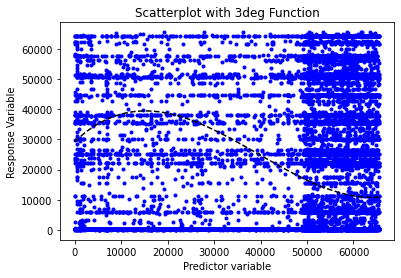

-----------------allow------------------------
weight =  [-1.15593855e-01  1.05107494e+04]
 
-0.1156 x + 1.051e+04
SSE =  [3.11941661e+12]
rmes =  2.7473090771704532e+16


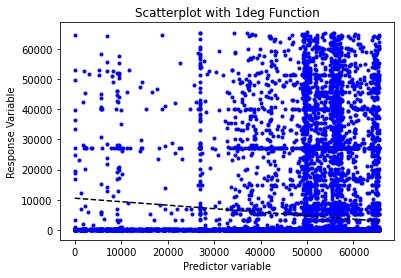

weight =  [-9.28107694e-07 -4.20981428e-02  9.31895428e+03]
            2
-9.281e-07 x - 0.0421 x + 9319
SSE =  [3.1205604e+12]
rmes =  2.7493241543276016e+16


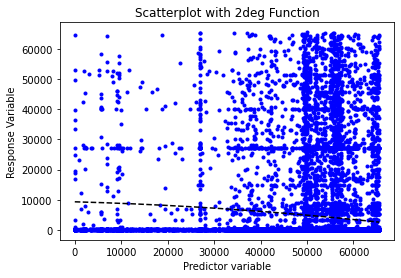

weight =  [ 1.12674556e-10 -1.37680829e-05  3.67562020e-01  6.60423703e+03]
           3             2
1.127e-10 x - 1.377e-05 x + 0.3676 x + 6604
SSE =  [3.123571e+12]
rmes =  2.754631597664417e+16


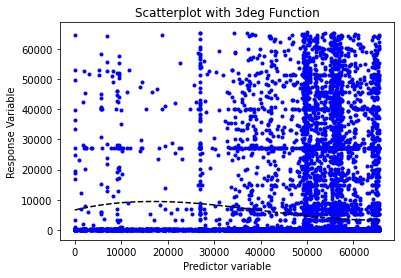

-----------------deny------------------------
weight =  [-4.84605713e-01  4.11341454e+04]
 
-0.4846 x + 4.113e+04
SSE =  [7.73024047e+12]
rmes =  3.0724631721963437e+17


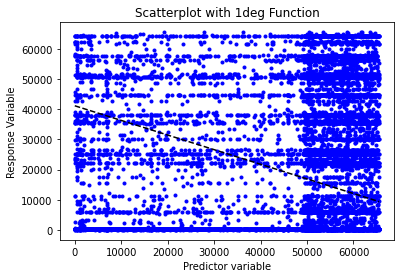

weight =  [-6.72171919e-06 -1.88245195e-02  3.63616442e+04]
            2
-6.722e-06 x - 0.01882 x + 3.636e+04
SSE =  [7.78965535e+12]
rmes =  3.1198747852479085e+17


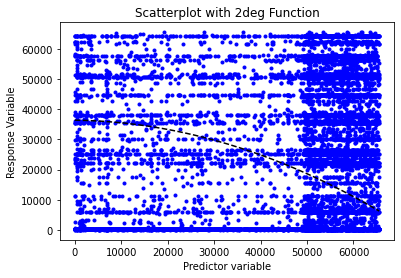

weight =  [ 4.96527951e-10 -5.89160780e-05  1.44767246e+00  2.92989956e+04]
           3             2
4.965e-10 x - 5.892e-05 x + 1.448 x + 2.93e+04
SSE =  [7.90272579e+12]
rmes =  3.211104979706585e+17


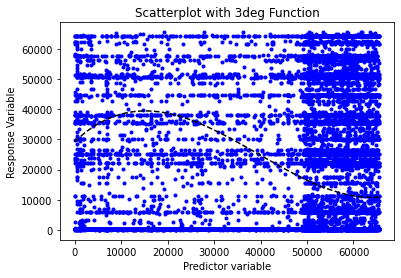

In [2]:
from linear_regression import *
get_graph_0()
get_graph_1()

## Correlation Matrix
According to the correlation matrix and graphs below, we can find that Bytes, Bytes Sent, Bytes Received, Packets,Elapsed Time (sec), pkts_sent and pkts_received often have higher correlation. for M2 graph, which is the graph of "drop", because in the data set, there are feww "drop" case, so the graph is different from the other three graphs.

                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000         -0.106150         0.114879   
Destination Port        -0.106150          1.000000        -0.010596   
NAT Source Port          0.114879         -0.010596         1.000000   
NAT Destination Port    -0.094682          0.990909         0.000630   
Bytes                   -0.002873          0.000337        -0.000851   
Bytes Sent              -0.002623          0.006821        -0.002352   
Bytes Received          -0.002477         -0.009835         0.001715   
Packets                 -0.006592          0.000432        -0.000387   
Elapsed Time (sec)      -0.119588          0.182443         0.000225   
pkts_sent               -0.004697          0.003569        -0.001480   
pkts_received           -0.008419         -0.004172         0.001251   
Class_1                       NaN               NaN              NaN   

                      NAT Destination Port     Bytes  Bytes Sen

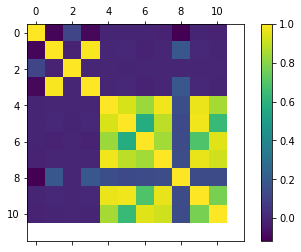

                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000         -0.054788         0.014378   
Destination Port        -0.054788          1.000000        -0.042930   
NAT Source Port          0.014378         -0.042930         1.000000   
NAT Destination Port    -0.020740         -0.021734         0.150302   
Bytes                   -0.188534          0.075997         0.119525   
Bytes Sent              -0.192793          0.080596         0.034714   
Bytes Received           0.010993         -0.025093         0.620277   
Packets                 -0.020805         -0.068448         0.840632   
Elapsed Time (sec)       0.008731         -0.020243         0.495748   
pkts_sent               -0.050254         -0.077705         0.511045   
pkts_received            0.016332         -0.040431         0.972855   
Class_1                       NaN               NaN              NaN   

                      NAT Destination Port     Bytes  Bytes Sen

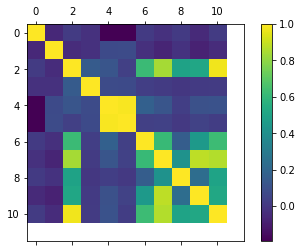

                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000               NaN              NaN   
Destination Port              NaN               NaN              NaN   
NAT Source Port               NaN               NaN              NaN   
NAT Destination Port          NaN               NaN              NaN   
Bytes                    0.004434               NaN              NaN   
Bytes Sent               0.004434               NaN              NaN   
Bytes Received                NaN               NaN              NaN   
Packets                       NaN               NaN              NaN   
Elapsed Time (sec)            NaN               NaN              NaN   
pkts_sent                     NaN               NaN              NaN   
pkts_received                 NaN               NaN              NaN   
Class_1                       NaN               NaN              NaN   

                      NAT Destination Port     Bytes  Bytes Sen

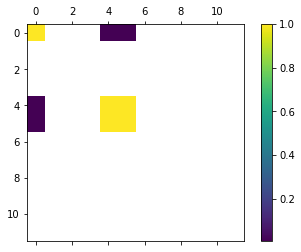

                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000         -0.101394         0.342186   
Destination Port        -0.101394          1.000000        -0.517566   
NAT Source Port          0.342186         -0.517566         1.000000   
NAT Destination Port     0.097124         -0.625760         0.827100   
Bytes                   -0.011875         -0.563395         0.744352   
Bytes Sent              -0.067753         -0.486777         0.642941   
Bytes Received           0.097124         -0.625760         0.827100   
Packets                  0.097124         -0.625760         0.827100   
Elapsed Time (sec)      -0.041760         -0.451796         0.462185   
pkts_sent                0.097124         -0.625760         0.827100   
pkts_received            0.097124         -0.625760         0.827100   
Class_1                       NaN               NaN              NaN   

                      NAT Destination Port     Bytes  Bytes Sen

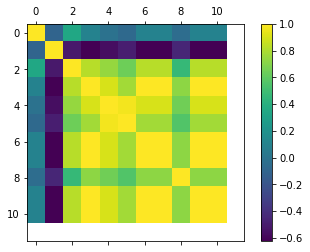

                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000         -0.106150         0.114879   
Destination Port        -0.106150          1.000000        -0.010596   
NAT Source Port          0.114879         -0.010596         1.000000   
NAT Destination Port    -0.094682          0.990909         0.000630   
Bytes                   -0.002873          0.000337        -0.000851   
Bytes Sent              -0.002623          0.006821        -0.002352   
Bytes Received          -0.002477         -0.009835         0.001715   
Packets                 -0.006592          0.000432        -0.000387   
Elapsed Time (sec)      -0.119588          0.182443         0.000225   
pkts_sent               -0.004697          0.003569        -0.001480   
pkts_received           -0.008419         -0.004172         0.001251   
Class_1                       NaN               NaN              NaN   

                      NAT Destination Port     Bytes  Bytes Sen

In [4]:
from correlation_matrix import *
get_M0()
get_M1()
get_M2()
get_M3()

# Pair Plot
For cases deny, drop and reset-both, the features NAT Source Port, NAT Destination Port, Bytes Received, Packets, Elapsed Time (sec), pkts_sent and pkts_received are always 0 or 1. Also, According to the results in the correlation matrix above, so I choose 'Source Port', 'Destination Port', 'Bytes' and 'Bytes Sent' to draw the pair plot.
By comparing, when destination port > 20000 and source port < 40000, it may be "deny" action.
When byte > 10, bytes sent > 1.5, it must be "deny" action.

##### Class 0 pair plot

![jupyter](pair_0.png)

##### Class 1 pair plot

![jupyter](pair_1.png)

##
## Conclusion
Among the three algorithm, K-nn has the highest accuracy, but due to their definition, logistic is the most suitable in predicting Firewall actions.
According to the correlation martrix, the features NAT Source Port, NAT Destination Port, Bytes Received, Packets, Elapsed Time (sec), pkts_sent and pkts_received are important and obvious features to check if it should be "allow" or "deny". By comparing the pair plots, when destination port > 20000 and source port < 40000, it may be "deny" action. When byte > 10, bytes sent > 1.5, it must be "deny" action.